In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn import metrics

In [2]:
cust_data = pd.read_csv("C:/Users/SANJAY/Desktop/ExcelR/Project/Project 3/Depolyment/cust_data.csv")

In [3]:
cust_data

Unnamed: 0     ID  Year_Birth       Education Marital_Status   Income  \
0              0   5524        1957      Graduation         Single  58138.0   
1              1   2174        1954      Graduation         Single  46344.0   
2              2   4141        1965      Graduation        Married  71613.0   
3              3   6182        1984      Graduation        Married  26646.0   
4              4   5324        1981  PostGraduation        Married  58293.0   
...          ...    ...         ...             ...            ...      ...   
2190        2235  10870        1967      Graduation        Married  61223.0   
2191        2236   4001        1946  PostGraduation        Married  64014.0   
2192        2237   7270        1981      Graduation         Single  56981.0   
2193        2238   8235        1956  PostGraduation        Married  69245.0   
2194        2239   9405        1954  PostGraduation        Married  52869.0   

      Kidhome  Teenhome Dt_Customer  Recency  ...  Complain  Response  \
0           0         0  2012-09-04       58  ...         0         1   
1           1         1  2014-03-08       38  ...         0         0   
2           0         0  2013-08-21       26  ...         0         0   
3           1         0  2014-02-10       26  ...         0         0   
4           1         0  2014-01-19       94  ...         0         0   
...       ...       ...         ...      ...  ...       ...       ...   
2190        0         1  2013-06-13       46  ...         0         0   
2191        2         1  2014-06-10       56  ...         0         0   
2192        0         0  2014-01-25       91  ...         0         0   
2193        0         1  2014-01-24        8  ...         0         0   
2194        1         1  2012-10-15       40  ...         0         1   

      CustomerAge  Sr_Customer  Children  TotalAcceptedCmp  MntTotalProducts  \
0              66           11         0                 0              1269   
1              69            9         2                 0                18   
2              58           10         0                 0               602   
3              39            9         1                 0                35   
4              42            9         1                 0               334   
...           ...          ...       ...               ...               ...   
2190           56           10         1                 0               934   
2191           77            9         3                 1               436   
2192           42            9         0                 0              1173   
2193           67            9         1                 0               672   
2194           69           11         2                 0               148   

      NumTotalPurchases  Income_Grp  CustomerAgeGrp  
0                    21        High       SrCitizen  
1                     4         Low       SrCitizen  
2                    11        High       MiddleAge  
3                     4         Low           Adult  
4                    13        High           Adult  
...                 ...         ...             ...  
2190                 14        High       MiddleAge  
2191                 17        High       SrCitizen  
2192                  6        High           Adult  
2193                 13        High       SrCitizen  
2194                  7        High       SrCitizen  

[2195 rows x 36 columns]

In [4]:
cust_data.drop(['Unnamed: 0'], axis=1, inplace=True)

In [5]:
cust_data

ID  Year_Birth       Education Marital_Status   Income  Kidhome  \
0      5524        1957      Graduation         Single  58138.0        0   
1      2174        1954      Graduation         Single  46344.0        1   
2      4141        1965      Graduation        Married  71613.0        0   
3      6182        1984      Graduation        Married  26646.0        1   
4      5324        1981  PostGraduation        Married  58293.0        1   
...     ...         ...             ...            ...      ...      ...   
2190  10870        1967      Graduation        Married  61223.0        0   
2191   4001        1946  PostGraduation        Married  64014.0        2   
2192   7270        1981      Graduation         Single  56981.0        0   
2193   8235        1956  PostGraduation        Married  69245.0        0   
2194   9405        1954  PostGraduation        Married  52869.0        1   

      Teenhome Dt_Customer  Recency  MntWines  ...  Complain  Response  \
0            0  2012-09-04       58       635  ...         0         1   
1            1  2014-03-08       38        11  ...         0         0   
2            0  2013-08-21       26       426  ...         0         0   
3            0  2014-02-10       26        11  ...         0         0   
4            0  2014-01-19       94       173  ...         0         0   
...        ...         ...      ...       ...  ...       ...       ...   
2190         1  2013-06-13       46       709  ...         0         0   
2191         1  2014-06-10       56       406  ...         0         0   
2192         0  2014-01-25       91       908  ...         0         0   
2193         1  2014-01-24        8       428  ...         0         0   
2194         1  2012-10-15       40        84  ...         0         1   

      CustomerAge  Sr_Customer  Children  TotalAcceptedCmp  MntTotalProducts  \
0              66           11         0                 0              1269   
1              69            9         2                 0                18   
2              58           10         0                 0               602   
3              39            9         1                 0                35   
4              42            9         1                 0               334   
...           ...          ...       ...               ...               ...   
2190           56           10         1                 0               934   
2191           77            9         3                 1               436   
2192           42            9         0                 0              1173   
2193           67            9         1                 0               672   
2194           69           11         2                 0               148   

      NumTotalPurchases  Income_Grp  CustomerAgeGrp  
0                    21        High       SrCitizen  
1                     4         Low       SrCitizen  
2                    11        High       MiddleAge  
3                     4         Low           Adult  
4                    13        High           Adult  
...                 ...         ...             ...  
2190                 14        High       MiddleAge  
2191                 17        High       SrCitizen  
2192                  6        High           Adult  
2193                 13        High       SrCitizen  
2194                  7        High       SrCitizen  

[2195 rows x 35 columns]

In [6]:
cust_data.drop(['ID','Year_Birth','Dt_Customer','Recency','Complain','Kidhome','Teenhome','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','AcceptedCmp2','AcceptedCmp1','Response'], axis=1,inplace=True)

In [7]:
#cust_data.drop(['Income_Grp','CustomerAgeGrp','Complain','Sr_Customer'],  axis=1,inplace=True)

In [8]:
data_clean = cust_data.copy()

In [9]:
data_clean

Education Marital_Status   Income  MntWines  MntFruits  \
0         Graduation         Single  58138.0       635         88   
1         Graduation         Single  46344.0        11          1   
2         Graduation        Married  71613.0       426         49   
3         Graduation        Married  26646.0        11          4   
4     PostGraduation        Married  58293.0       173         43   
...              ...            ...      ...       ...        ...   
2190      Graduation        Married  61223.0       709         43   
2191  PostGraduation        Married  64014.0       406          0   
2192      Graduation         Single  56981.0       908         48   
2193  PostGraduation        Married  69245.0       428         30   
2194  PostGraduation        Married  52869.0        84          3   

      MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  \
0                 546              172                88            88   
1                   6                2                 1             6   
2                 127              111                21            42   
3                  20               10                 3             5   
4                 118               46                27            15   
...               ...              ...               ...           ...   
2190              182               42               118           247   
2191               30                0                 0             8   
2192              217               32                12            24   
2193              214               80                30            61   
2194               61                2                 1            21   

      NumDealsPurchases  ...  NumStorePurchases  NumWebVisitsMonth  \
0                     3  ...                  4                  7   
1                     2  ...                  2                  5   
2                     1  ...                 10                  4   
3                     2  ...                  4                  6   
4                     5  ...                  6                  5   
...                 ...  ...                ...                ...   
2190                  2  ...                  4                  5   
2191                  7  ...                  5                  7   
2192                  1  ...                 13                  6   
2193                  2  ...                 10                  3   
2194                  3  ...                  4                  7   

      CustomerAge  Sr_Customer  Children  TotalAcceptedCmp  MntTotalProducts  \
0              66           11         0                 0              1269   
1              69            9         2                 0                18   
2              58           10         0                 0               602   
3              39            9         1                 0                35   
4              42            9         1                 0               334   
...           ...          ...       ...               ...               ...   
2190           56           10         1                 0               934   
2191           77            9         3                 1               436   
2192           42            9         0                 0              1173   
2193           67            9         1                 0               672   
2194           69           11         2                 0               148   

      NumTotalPurchases  Income_Grp  CustomerAgeGrp  
0                    21        High       SrCitizen  
1                     4         Low       SrCitizen  
2                    11        High       MiddleAge  
3                     4         Low           Adult  
4                    13        High           Adult  
...                 ...         ...             ...  
2190                 14        High       MiddleAge  
2191                 17        High       SrCitizen  
2192 

In [10]:
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', None)

# Data Preprocessing

Converting categorical to numerical features

In [11]:
#LE=LabelEncoder()

In [12]:
#data_clean['Education']=LE.fit_transform(data_clean['Education'])

In [13]:
#data_clean['Education'].value_counts()

In [14]:
#data_clean['Marital_Status']=LE.fit_transform(data_clean['Marital_Status'])

In [15]:
#data_clean['Marital_Status'].value_counts()

In [16]:
#data_clean['Income_Grp']=LE.fit_transform(data_clean['Income_Grp'])

In [17]:
#data_clean['Income_Grp'].value_counts()

In [18]:
#data_clean['CustomerAgeGrp']=LE.fit_transform(data_clean['CustomerAgeGrp'])

In [19]:
#data_clean['CustomerAgeGrp'].value_counts()

In [20]:
#ohe=OneHotEncoder()

In [21]:
#enc_df = pd.DataFrame(ohe.fit_transform(data_clean[['Education']]).toarray())
#enc_df

In [22]:
#enc_df.rename(columns = {0:'Edu_0', 1:'Edu_1', 2:'Edu_2'}, inplace = True)

In [23]:
#data_clean = data_clean.join(enc_df)
#data_clean

In [24]:
#enc_df = pd.DataFrame(ohe.fit_transform(data_clean[['Marital_Status']]).toarray())
#enc_df

In [25]:
#enc_df.rename(columns = {0:'MaritalStatus_0', 1:'MaritalStatus_1'}, inplace = True)

In [26]:
#data_clean = data_clean.join(enc_df)
#data_clean

In [27]:
data_clean=pd.get_dummies(data_clean)

In [28]:
data_clean

Income  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0     58138.0       635         88              546              172   
1     46344.0        11          1                6                2   
2     71613.0       426         49              127              111   
3     26646.0        11          4               20               10   
4     58293.0       173         43              118               46   
...       ...       ...        ...              ...              ...   
2190  61223.0       709         43              182               42   
2191  64014.0       406          0               30                0   
2192  56981.0       908         48              217               32   
2193  69245.0       428         30              214               80   
2194  52869.0        84          3               61                2   

      MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
0                   88            88                  3                8   
1                    1             6                  2                1   
2                   21            42                  1                8   
3                    3             5                  2                2   
4                   27            15                  5                5   
...                ...           ...                ...              ...   
2190               118           247                  2                9   
2191                 0             8                  7                8   
2192                12            24                  1                2   
2193                30            61                  2                6   
2194                 1            21                  3                3   

      NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  CustomerAge  \
0                      10                  4                  7           66   
1                       1                  2                  5           69   
2                       2                 10                  4           58   
3                       0                  4                  6           39   
4                       3                  6                  5           42   
...                   ...                ...                ...          ...   
2190                    3                  4                  5           56   
2191                    2                  5                  7           77   
2192                    3                 13                  6           42   
2193                    5                 10                  3           67   
2194                    1                  4                  7           69   

      Sr_Customer  Children  TotalAcceptedCmp  MntTotalProducts  \
0              11         0                 0              1269   
1               9         2                 0                18   
2              10         0                 0               602   
3               9         1                 0                35   
4               9         1                 0               334   
...           ...       ...               ...               ...   
2190           10         1                 0               934   
2191            9         3                 1               436   
2192            9         0                 0              1173   
2193            9         1                 0               672   
2194           11         2                 0               148   

      NumTotalPurchases  Education_Graduation  Education_PostGraduation  \
0                    21                     1                         0   
1                     4                     1                         0   
2                    11                     1                         0   
3                     4                     1                         0   
4                    13                     0                         1   
...          

In [29]:
data_clean.columns

Index(['Income', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'CustomerAge', 'Sr_Customer', 'Children',
       'TotalAcceptedCmp', 'MntTotalProducts', 'NumTotalPurchases',
       'Education_Graduation', 'Education_PostGraduation',
       'Education_UnderGraduation', 'Marital_Status_Married',
       'Marital_Status_Single', 'Income_Grp_High', 'Income_Grp_Low',
       'CustomerAgeGrp_Adult', 'CustomerAgeGrp_MiddleAge',
       'CustomerAgeGrp_SrCitizen'],
      dtype='object')

In [30]:
data_final=data_clean[['Income',
    'NumWebVisitsMonth', 'CustomerAge', #'TotalAcceptedCmp', 'Sr_Customer',
    'Children','MntTotalProducts', 'NumTotalPurchases',
       'Education_Graduation',  'Education_PostGraduation',
       'Education_UnderGraduation', 'Marital_Status_Married',
       #'Marital_Status_Single', 'Income_Grp_High', 'Income_Grp_Low',
       #'CustomerAgeGrp_Adult', 'CustomerAgeGrp_MiddleAge', 'CustomerAgeGrp_SrCitizen'
                      ]]
data_final

Income  NumWebVisitsMonth  CustomerAge  Children  MntTotalProducts  \
0     58138.0                  7           66         0              1269   
1     46344.0                  5           69         2                18   
2     71613.0                  4           58         0               602   
3     26646.0                  6           39         1                35   
4     58293.0                  5           42         1               334   
...       ...                ...          ...       ...               ...   
2190  61223.0                  5           56         1               934   
2191  64014.0                  7           77         3               436   
2192  56981.0                  6           42         0              1173   
2193  69245.0                  3           67         1               672   
2194  52869.0                  7           69         2               148   

      NumTotalPurchases  Education_Graduation  Education_PostGraduation  \
0                    21                     1                         0   
1                     4                     1                         0   
2                    11                     1                         0   
3                     4                     1                         0   
4                    13                     0                         1   
...                 ...                   ...                       ...   
2190                 14                     1                         0   
2191                 17                     0                         1   
2192                  6                     1                         0   
2193                 13                     0                         1   
2194                  7                     0                         1   

      Education_UnderGraduation  Marital_Status_Married  
0                             0                       0  
1                             0                       0  
2                             0                       1  
3                             0                       1  
4                             0                       1  
...                         ...                     ...  
2190                          0                       1  
2191                          0                       1  
2192                          0                       0  
2193                          0                       1  
2194                          0                       1  

[2195 rows x 10 columns]

Applying Standard Scalar

In [31]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data = pd.DataFrame(scaler.fit_transform(data_final))
data 

0         1         2         3         4         5         6  \
0     0.311027  0.730128  1.018978 -1.266451  1.482331  2.340029  0.989576   
1    -0.263794 -0.134990  1.275466  1.405206 -0.925357 -0.979423  0.989576   
2     0.967777 -0.567549  0.335011 -1.266451  0.198616  0.387410  0.989576   
3    -1.223843  0.297569 -1.289410  0.069378 -0.892639 -0.979423  0.989576   
4     0.318581 -0.134990 -1.032922  0.069378 -0.317180  0.777934 -1.010534   
...        ...       ...       ...       ...       ...       ...       ...   
2190  0.461385 -0.134990  0.164020  0.069378  0.837586  0.973196  0.989576   
2191  0.597414  0.730128  1.959433  2.741035 -0.120870  1.558982 -1.010534   
2192  0.254637  0.297569 -1.032922 -1.266451  1.297569 -0.588899  0.989576   
2193  0.852364 -1.000108  1.104474  0.069378  0.333338  0.777934 -1.010534   
2194  0.054224  0.730128  1.275466  1.405206 -0.675158 -0.393637 -1.010534   

             7         8         9  
0    -0.783563 -0.359326 -1.348227  
1    -0.783563 -0.359326 -1.348227  
2    -0.783563 -0.359326  0.741715  
3    -0.783563 -0.359326  0.741715  
4     1.276222 -0.359326  0.741715  
...        ...       ...       ...  
2190 -0.783563 -0.359326  0.741715  
2191  1.276222 -0.359326  0.741715  
2192 -0.783563 -0.359326 -1.348227  
2193  1.276222 -0.359326  0.741715  
2194  1.276222 -0.359326  0.741715  

[2195 rows x 10 columns]

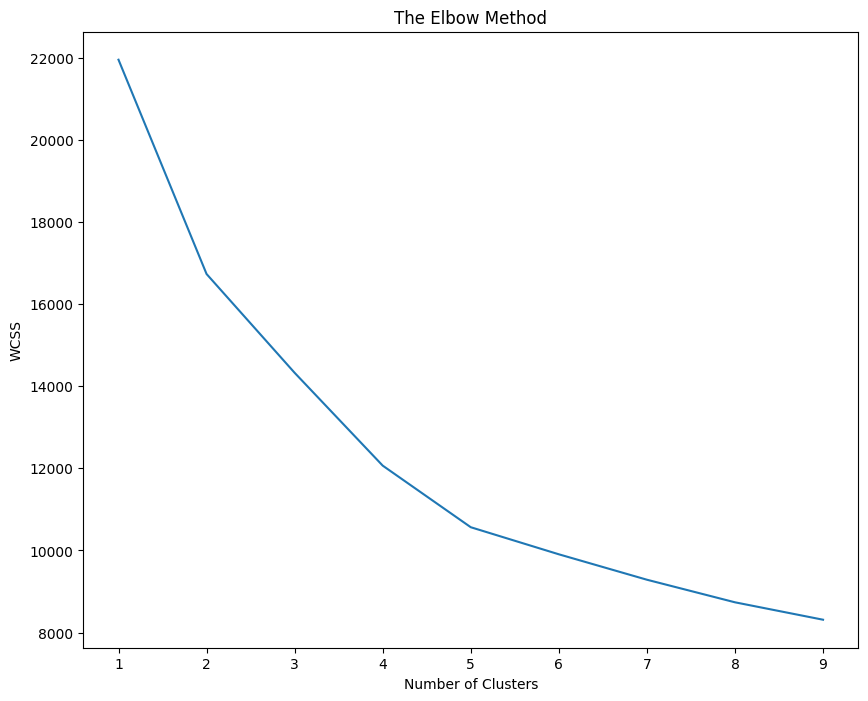

In [32]:
from sklearn.cluster import KMeans
fig = plt.figure(figsize=(10, 8))
WCSS = []
for i in range(1, 10):
    clf = KMeans(n_clusters=i,random_state=1)
    clf.fit(data)
    WCSS.append(clf.inertia_) # inertia is another name for WCSS
plt.plot(range(1, 10), WCSS)
plt.title('The Elbow Method')
plt.ylabel('WCSS')
plt.xlabel('Number of Clusters')
plt.show() 

In [33]:
from sklearn.metrics import davies_bouldin_score, calinski_harabasz_score

[0.22103622582156351, 0.21642055066260948, 0.25070179497867906, 0.2596772878840423, 0.23235452746985766, 0.2292061692672572, 0.23715434861152312, 0.23580088610694977]


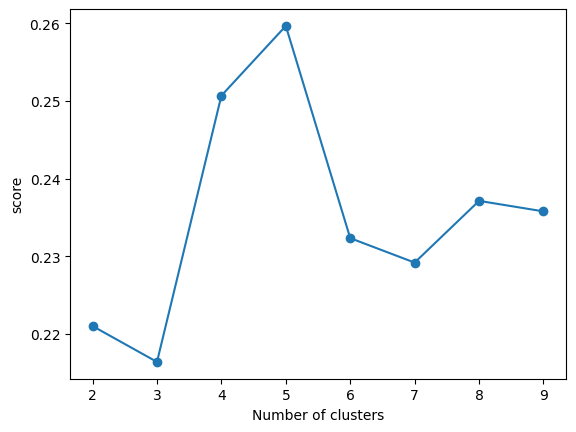

In [34]:
sil = []
sil2=[]
for i in range(2, 10):
    kmeans = KMeans(n_clusters=i)
    label=kmeans.fit_predict(data) 
    sil.append(metrics.silhouette_score(data,label))
    sil2.append([i, metrics.silhouette_score(data,label), davies_bouldin_score(data, label),
                 calinski_harabasz_score(data,label)])

print(sil)    

plt.scatter(range(2, 10), sil)
plt.plot(range(2, 10), sil)
plt.xticks(range(2, 10))

plt.xlabel('Number of clusters')
plt.ylabel('score')
plt.show()

In [35]:
pd.DataFrame(sil2,
             columns=["K", "Silhouette_Score", "davies_bouldin_score", "calinski_harabasz_score"]).sort_values(["Silhouette_Score"], ascending=False)

K  Silhouette_Score  davies_bouldin_score  calinski_harabasz_score
3  5          0.259677              1.394191               590.087759
2  4          0.250702              1.357646               598.447689
6  8          0.237154              1.501529               475.124960
7  9          0.235801              1.519742               460.624327
4  6          0.232355              1.473214               532.409199
5  7          0.229206              1.518818               497.295120
0  2          0.221036              1.738629               684.072620
1  3          0.216421              1.597935               583.407578

In [36]:
clf = KMeans(n_clusters=2)
y_kmeans = clf.fit_predict(data)  

In [37]:
y_kmeans 

array([1, 0, 1, ..., 1, 1, 0])

In [38]:
clf.cluster_centers_

array([[-0.7137353 ,  0.50739001, -0.16126487,  0.41007345, -0.71991184,
        -0.5835409 , -0.02904331, -0.04210675,  0.10986523,  0.0096451 ],
       [ 0.92501887, -0.65759019,  0.20900332, -0.53146549,  0.93302381,
         0.75628365,  0.03764086,  0.05457141, -0.1423881 , -0.01250029]])

In [39]:
clf.labels_

array([1, 0, 1, ..., 1, 1, 0])

In [40]:
clf.inertia_

16730.969291201127

In [41]:
km=pd.Series(y_kmeans)  # converting numpy array into pandas series object 
km.value_counts()

0    1239
1     956
dtype: int64

In [42]:
import sklearn
print(sklearn.metrics.silhouette_score(data, y_kmeans))
print(davies_bouldin_score(data, y_kmeans))
print(calinski_harabasz_score(data,y_kmeans))

0.22106864653367614
1.73840539541417
684.0807693320596


Text(0.5, 1.0, 'Clusters using KMeans')

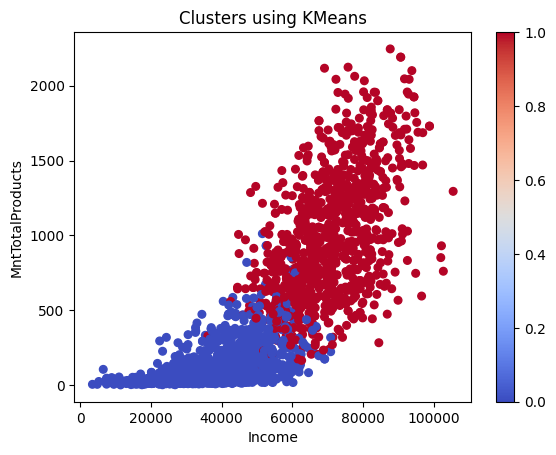

In [43]:
data_final.plot(x="Income",y ="MntTotalProducts",c=clf.labels_,kind="scatter",s=30 ,cmap=plt.cm.coolwarm) 
plt.title('Clusters using KMeans') 

In [44]:
clf = KMeans(n_clusters=3)
y_kmeans = clf.fit_predict(data)  


In [45]:
y_kmeans

array([1, 2, 1, ..., 1, 0, 0])

In [46]:
clf.cluster_centers_

array([[-0.26397515,  0.32987065,  0.19955037,  0.43803186, -0.37230669,
        -0.15875245, -1.01053384,  1.27622197, -0.35932607, -0.00129991],
       [ 1.03218475, -0.82160066,  0.13470992, -0.69617456,  1.0579258 ,
         0.74888472,  0.265086  , -0.20000149, -0.11135565, -0.03153632],
       [-0.78817632,  0.53585235, -0.28170446,  0.3328974 , -0.73006914,
        -0.59689377,  0.51808606, -0.78356275,  0.38141784,  0.03123861]])

In [47]:
clf.labels_

array([1, 2, 1, ..., 1, 0, 0])

In [48]:
clf.inertia_

14324.813296666582

In [49]:
km=pd.Series(y_kmeans)  # converting numpy array into pandas series object 
km.value_counts()

2    806
1    773
0    616
dtype: int64

In [50]:

print(sklearn.metrics.silhouette_score(data, y_kmeans))
print(davies_bouldin_score(data, y_kmeans))
print(calinski_harabasz_score(data,y_kmeans))

0.21642055066260948
1.5979351180028265
583.407577730745


Text(0.5, 1.0, 'Clusters using KMeans')

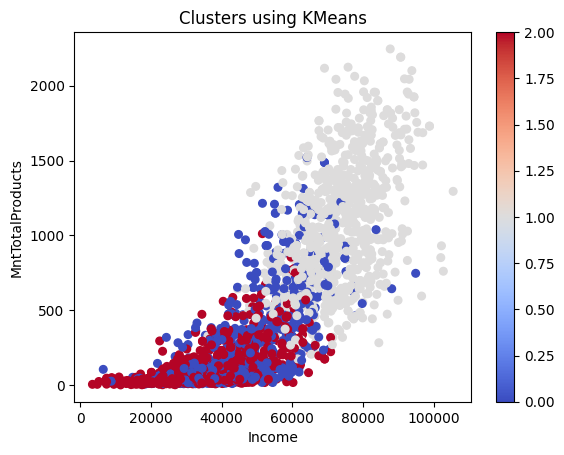

In [51]:
data_final.plot(x="Income",y ="MntTotalProducts",c=clf.labels_,kind="scatter",s=30 ,cmap=plt.cm.coolwarm) 
plt.title('Clusters using KMeans') 

In [52]:
import plotly.express as px
fig = px.scatter_3d(data_final, x="Income",y="MntTotalProducts", z="NumTotalPurchases", color=clf.labels_) 
fig.show()

In [53]:
clf = KMeans(n_clusters=4)
y_kmeans = clf.fit_predict(data)  


In [54]:
y_kmeans

array([0, 3, 0, ..., 0, 1, 1])

In [55]:
clf.cluster_centers_

array([[ 1.10121288e+00, -8.98871002e-01,  1.42060959e-01,
        -7.75158083e-01,  1.19249296e+00,  7.52116729e-01,
         2.96528801e-01, -9.80113030e-02, -3.16346098e-01,
        -2.69260996e-02],
       [-2.63975154e-01,  3.29870647e-01,  1.99550369e-01,
         4.38031858e-01, -3.72306689e-01, -1.58752454e-01,
        -1.01053384e+00,  1.27622197e+00, -3.59326072e-01,
        -1.29991492e-03],
       [-5.67676072e-01,  2.54670727e-01, -4.65540808e-01,
        -9.62206949e-02, -4.67999862e-01, -3.51680189e-01,
        -1.01053384e+00, -7.83562753e-01,  2.78298759e+00,
         5.94613768e-02],
       [-6.25348704e-01,  4.81040479e-01, -1.52780947e-01,
         3.88088075e-01, -6.51050777e-01, -4.59491444e-01,
         9.89575967e-01, -7.83562753e-01, -3.59326072e-01,
         6.08021790e-03]])

In [56]:
clf.labels_

array([0, 3, 0, ..., 0, 1, 1])

In [57]:
clf.inertia_

12064.28002078012

In [58]:
km=pd.Series(y_kmeans)  # converting numpy array into pandas series object 
km.value_counts()

3    679
0    658
1    616
2    242
dtype: int64

In [59]:

print(sklearn.metrics.silhouette_score(data, y_kmeans))
print(davies_bouldin_score(data, y_kmeans))
print(calinski_harabasz_score(data,y_kmeans))

0.2506807009959666
1.3572638484392954
598.4502027794235


Text(0.5, 1.0, 'Clusters using KMeans')

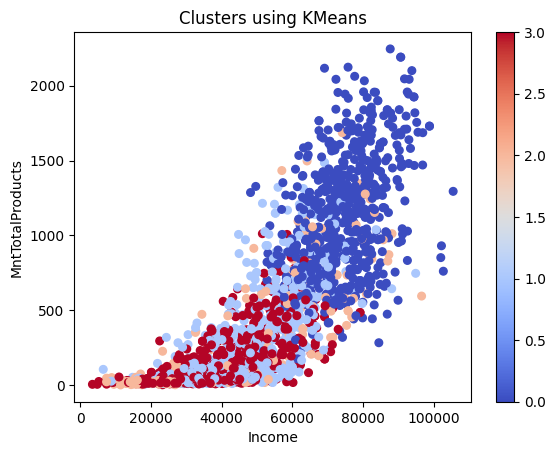

In [60]:
data_final.plot(x="Income",y ="MntTotalProducts",c=clf.labels_,kind="scatter",s=30 ,cmap=plt.cm.coolwarm) 
plt.title('Clusters using KMeans') 

In [61]:
import plotly.express as px
fig = px.scatter_3d(data_final, x="Income",y="MntTotalProducts", z="NumWebVisitsMonth", color=clf.labels_) 
fig.show()


In [62]:
clf = KMeans(n_clusters=5)
y_kmeans = clf.fit_predict(data)  


In [63]:
y_kmeans

array([1, 2, 1, ..., 1, 0, 3])

In [64]:
clf.cluster_centers_

array([[ 0.97522531, -0.68518559,  0.35099641, -0.59664427,  1.17369009,
         0.77461513, -1.01053384,  1.24704655, -0.31481738, -0.01611081],
       [ 0.94265243, -0.7108721 ,  0.10582783, -0.53854408,  0.8690064 ,
         0.74207756,  0.98957597, -0.78356275, -0.35932607, -0.03001989],
       [-0.7411924 ,  0.55653548, -0.19188502,  0.41432044, -0.72554295,
        -0.58087031,  0.98957597, -0.78356275, -0.35932607,  0.00611059],
       [-0.48156612,  0.42103059,  0.09748383,  0.5274546 , -0.61587446,
        -0.4285198 , -1.01053384,  1.27622197, -0.35932607,  0.00358371],
       [-0.53396636,  0.22195922, -0.43792685, -0.11524882, -0.44156028,
        -0.33886871, -1.01053384, -0.78356275,  2.78298759,  0.06205923]])

In [65]:
clf.labels_

array([1, 2, 1, ..., 1, 0, 3])

In [66]:
clf.inertia_

10564.130022379992

In [67]:
km=pd.Series(y_kmeans)  # converting numpy array into pandas series object 
km.value_counts()

2    608
1    501
3    487
0    353
4    246
dtype: int64

In [68]:
import sklearn
print(sklearn.metrics.silhouette_score(data, y_kmeans))
print(davies_bouldin_score(data, y_kmeans))
print(calinski_harabasz_score(data,y_kmeans))

0.2596772878840423
1.3941909621027342
590.0877591946349


Text(0.5, 1.0, 'Clusters using KMeans')

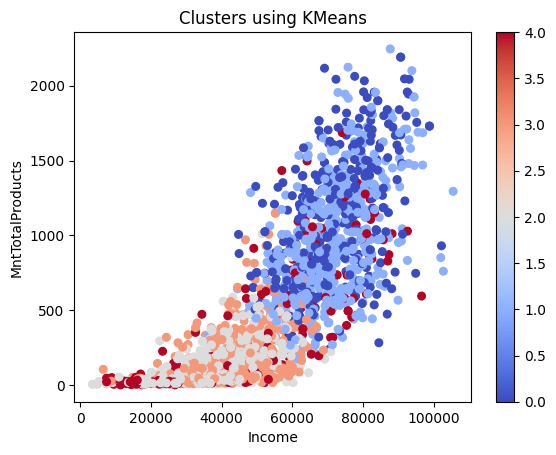

In [69]:
data_final.plot(x="Income",y ="MntTotalProducts",c=clf.labels_,kind="scatter",s=30 ,cmap=plt.cm.coolwarm) 
plt.title('Clusters using KMeans') 

In [70]:
import plotly.express as px
fig = px.scatter_3d(data_final, x="Income",y="MntTotalProducts", z="NumWebVisitsMonth", color=clf.labels_) 
fig.show()


In [71]:
clf = KMeans(n_clusters=6)
y_kmeans = clf.fit_predict(data) 

In [72]:
y_kmeans

array([0, 3, 2, ..., 2, 4, 5])

In [73]:
clf.cluster_centers_

array([[ 0.35112216,  0.19745161,  0.25230615,  0.34684968,  0.22275595,
         0.82660465,  0.98957597, -0.78356275, -0.35932607,  0.02232861],
       [-0.56070629,  0.24950703, -0.456617  , -0.10103646, -0.46006885,
        -0.34783512, -1.01053384, -0.78356275,  2.78298759,  0.05366842],
       [ 1.20194106, -1.23816092,  0.02200469, -1.05128363,  1.12158932,
         0.54597864,  0.93588174, -0.78356275, -0.27496866, -0.03675314],
       [-0.91707071,  0.56679683, -0.31010991,  0.34929216, -0.83409019,
        -0.86275194,  0.98957597, -0.78356275, -0.35932607, -0.01274521],
       [ 0.96231456, -0.67537904,  0.34799496, -0.58513982,  1.15922814,
         0.77345811, -1.01053384,  1.27622197, -0.35932607, -0.01880812],
       [-0.48163513,  0.42039459,  0.09752284,  0.52839715, -0.61737612,
        -0.43381463, -1.01053384,  1.27622197, -0.35932607,  0.00636522]])

In [74]:
clf.labels_

array([0, 3, 2, ..., 2, 4, 5])

In [75]:
clf.inertia_

9904.754628320454

In [76]:
km=pd.Series(y_kmeans)  # converting numpy array into pandas series object 
km.value_counts()

5    486
3    482
4    349
0    337
2    298
1    243
dtype: int64

In [77]:
import sklearn
print(sklearn.metrics.silhouette_score(data, y_kmeans))
print(davies_bouldin_score(data, y_kmeans))
print(calinski_harabasz_score(data,y_kmeans))

0.23219657280890071
1.4722390879457057
532.411818526344


Text(0.5, 1.0, 'Clusters using KMeans')

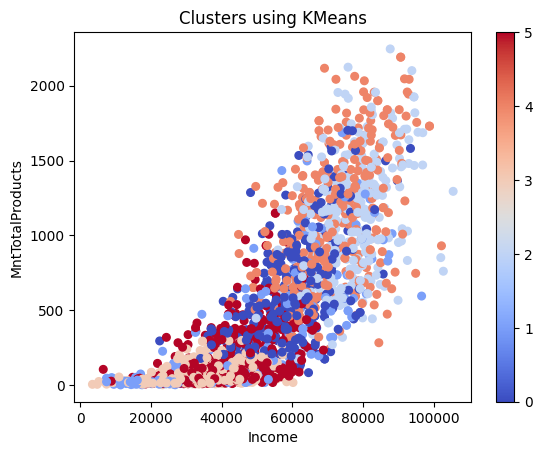

In [78]:
data_final.plot(x="Income",y ="MntTotalProducts",c=clf.labels_,kind="scatter",s=30 ,cmap=plt.cm.coolwarm) 
plt.title('Clusters using KMeans') 

In [79]:

#data_clean['Kclust']=km # creating a  new column and assigning it to new column 
#data_clean 

In [80]:
#data_clean.groupby('Kclust')['Kclust'].value_counts()

In [81]:
#data_clean.groupby('Kclust')['Education'].value_counts()

In [82]:
#data_clean.groupby('Kclust')['Children','Kclust'].value_counts()

In [83]:
#data_clean.groupby('Kclust')['Income_Grp','Kclust'].value_counts()

We can observe clusters formed based on Income group high and low. Cluster '0' is having majority Low income group customers and Cluster '1' is having majority High income group customers.

In [84]:
#data_clean.groupby('Marital_Status')['Kclust'].value_counts()

In [85]:
#plt.style.use(['classic']) 
#print(plt.style.available)  

In [86]:
#data_clean.plot(x="Income",y ="MntTotalProducts",c=clf.labels_,kind="scatter",s=30 ,cmap=plt.cm.coolwarm) 
#plt.title('Clusters using KMeans')   

# DBScan

In [87]:
array = data_final.values
stscaler = StandardScaler().fit(array)
X = stscaler.transform(array) 
X   

array([[ 0.31102694,  0.73012829,  1.01897823, ..., -0.78356275,
        -0.35932607, -1.34822662],
       [-0.26379389, -0.13498998,  1.27546581, ..., -0.78356275,
        -0.35932607, -1.34822662],
       [ 0.96777703, -0.56754911,  0.33501134, ..., -0.78356275,
        -0.35932607,  0.74171507],
       ...,
       [ 0.2546366 ,  0.29756915, -1.03292243, ..., -0.78356275,
        -0.35932607, -1.34822662],
       [ 0.85236448, -1.00010825,  1.10447409, ...,  1.27622197,
        -0.35932607,  0.74171507],
       [ 0.05422425,  0.73012829,  1.27546581, ...,  1.27622197,
        -0.35932607,  0.74171507]])

In [88]:
from sklearn.neighbors import NearestNeighbors  

In [89]:
neigh = NearestNeighbors(n_neighbors=46)
nbrs = neigh.fit(X)
distances, indices = nbrs.kneighbors(X)  

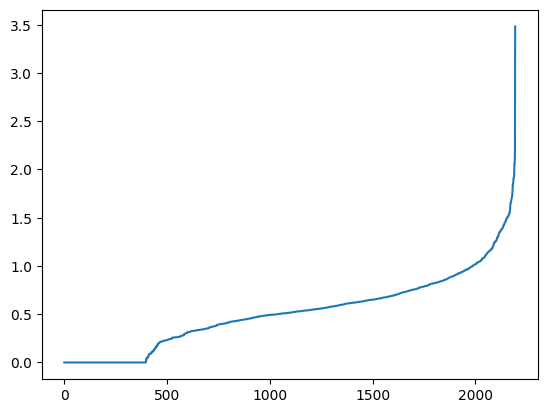

In [90]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)  

In [91]:
'''eps=range(1,10,1)
min_samples=range(1,30)
dav=[]
cal=[]
for i in eps:
    for j in min_samples:
        dbscan = DBSCAN(eps=i, min_samples=j)
        label=dbscan.fit_predict(X)
        if(len(set(label))>1):
            sil.append( [i, j, metrics.silhouette_score(X,label)])
            dav.append( [i, j, metrics.davies_bouldin_score(X,label)])
            cal.append( [i, j, metrics.calinski_harabasz_score(X,label)])'''



'eps=range(1,10,1)\nmin_samples=range(1,30)\ndav=[]\ncal=[]\nfor i in eps:\n    for j in min_samples:\n        dbscan = DBSCAN(eps=i, min_samples=j)\n        label=dbscan.fit_predict(X)\n        if(len(set(label))>1):\n            sil.append( [i, j, metrics.silhouette_score(X,label)])\n            dav.append( [i, j, metrics.davies_bouldin_score(X,label)])\n            cal.append( [i, j, metrics.calinski_harabasz_score(X,label)])'

In [92]:
import numpy as np
eps=range(1,10,1)
min_samples=range(1,20)
silh = []

for i in eps:
    for j in min_samples:
        dbscan = DBSCAN(eps=i, min_samples=j)
        label=dbscan.fit_predict(X)
        if(len(set(label))>1):
            silh.append( [i, j, metrics.silhouette_score(X,label), metrics.davies_bouldin_score(X,label),
                         metrics.calinski_harabasz_score(X,label)])



In [93]:
pd.DataFrame(silh, columns=["EPS", "n", "Sil_Score", "davies_bouldin_score", "calinski_harabasz_score"]).sort_values(["Sil_Score"], ascending=False)

EPS   n  Sil_Score  davies_bouldin_score  calinski_harabasz_score
56    3  19   0.239275              1.150776               167.291552
47    3  10   0.239275              1.150776               167.291552
38    3   1   0.239275              1.150776               167.291552
39    3   2   0.239275              1.150776               167.291552
41    3   4   0.239275              1.150776               167.291552
42    3   5   0.239275              1.150776               167.291552
43    3   6   0.239275              1.150776               167.291552
44    3   7   0.239275              1.150776               167.291552
45    3   8   0.239275              1.150776               167.291552
46    3   9   0.239275              1.150776               167.291552
40    3   3   0.239275              1.150776               167.291552
48    3  11   0.239275              1.150776               167.291552
50    3  13   0.239275              1.150776               167.291552
51    3  14   0.239275              1.150776               167.291552
52    3  15   0.239275              1.150776               167.291552
53    3  16   0.239275              1.150776               167.291552
54    3  17   0.239275              1.150776               167.291552
55    3  18   0.239275              1.150776               167.291552
49    3  12   0.239275              1.150776               167.291552
22    2   4   0.180979              2.253572               256.501717
21    2   3   0.180979              2.253572               256.501717
24    2   6   0.180822              2.249990               255.886534
23    2   5   0.180822              2.249990               255.886534
25    2   7   0.180649              2.269673               255.837524
26    2   8   0.180288              2.253007               256.270861
29    2  11   0.178197              2.033615               260.373156
32    2  14   0.178053              2.026349               261.120411
30    2  12   0.177923              2.037649               260.289348
31    2  13   0.177882              2.039707               260.388250
33    2  15   0.177779              2.033095               260.922338
37    2  19   0.177657              2.042678               260.439373
35    2  17   0.177536              2.050051               260.132283
36    2  18   0.177536              2.050051               260.132283
34    2  16   0.177536              2.050051               260.132283
27    2   9   0.172485              2.090983               222.966849
28    2  10   0.172413              2.003893               226.003807
20    2   2   0.170655              1.824486               195.131978
19    2   1   0.150650              1.324366               131.515914
5     1   6  -0.029792              1.633324                90.197338
6     1   7  -0.036313              1.598502                85.003134
4     1   5  -0.036799              1.601251                78.014185
3     1   4  -0.041177              1.577212                79.803121
8     1   9  -0.044430              1.616225                80.810691
2     1   3  -0.046095              1.450981                62.514545
9     1  10  -0.051154              1.593153                79.082234
7     1   8  -0.052482              1.579065                76.973650
10    1  11  -0.060424              1.655918                77.135216
11    1  12  -0.081706              1.631447                68.852702
1     1   2  -0.085640              1.298593                40.524423
17    1  18  -0.087614              1.606850                83.720606
12    1  13  -0.095040              1.641057                72.982638
18    1  19  -0.106619              1.658330                80.566367
16    1  17  -0.113320              1.606852                73.956742
14    1  15  -0.115477              1.598579                73.261954
13    1  14  -0.116208              1.633646                67.478259
15    1  16  -0.128346              1.607033                73.016798
0     1   1  -

In [94]:
#pd.DataFrame(sil, columns=["EPS", "n", "Sil_Score"]).sort_values(["Sil_Score"], ascending=False)

In [95]:
#pd.DataFrame(dav, columns=["EPS", "n",  "davies_bouldin_score"]).sort_values(["davies_bouldin_score"], ascending=True)

In [96]:
#pd.DataFrame(cal, columns=["EPS", "n", "calinski_harabasz_score"]).sort_values(["calinski_harabasz_score"], ascending=False)

In [97]:
dbscan = DBSCAN(eps=3, min_samples=12) #4, 23
dbscan.fit_predict(X)  

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [98]:
dbscan.labels_  

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [99]:
cl=pd.DataFrame(dbscan.labels_ ,columns=['cluster'])   

In [100]:
cl.value_counts() 

cluster
 0         1943
 1          251
-1            1
dtype: int64

In [101]:
sklearn.metrics.silhouette_score(X, dbscan.labels_ )

0.2392752157633787

In [102]:
import sklearn
print(sklearn.metrics.silhouette_score(X, dbscan.labels_   ))
print(metrics.davies_bouldin_score(X, dbscan.labels_  ))
print(metrics.calinski_harabasz_score(X, dbscan.labels_  ))

0.2392752157633787
1.1507755244667417
167.2915523109732


In [103]:
#ds=pd.Series(dbscan.labels_)  # converting numpy array into pandas series object 
#data_clean['Dclust']=ds # creating a  new column and assigning it to new column 
#data_clean 

In [104]:
#data_clean.groupby('Dclust')['Dclust'].value_counts()

In [105]:
#sklearn.metrics.silhouette_score(data, dbscan.labels_)

Text(0.5, 1.0, 'Clusters using DBScan')

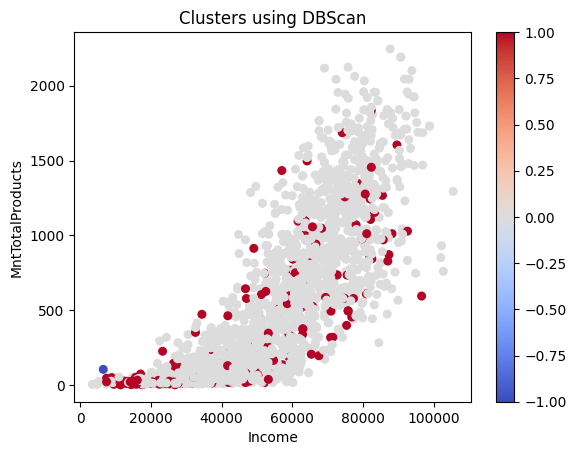

In [106]:
data_final.plot(x="Income",y ="MntTotalProducts",c=dbscan.labels_  ,kind="scatter",s=30 ,cmap=plt.cm.coolwarm) 
plt.title('Clusters using DBScan')

# Hierarchical Clustering

In [107]:
#data=data_final.copy()

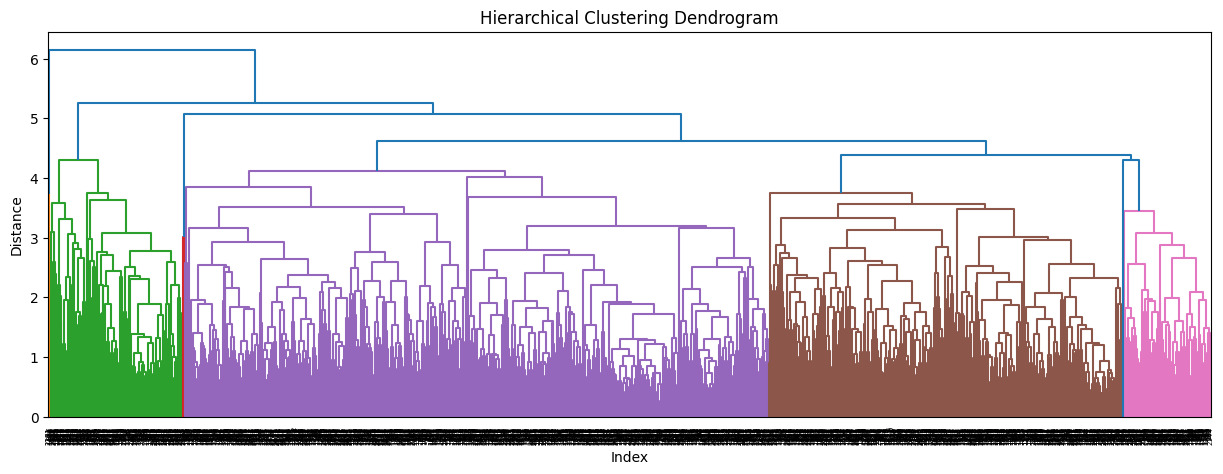

In [108]:
from scipy.cluster.hierarchy import linkage 
import scipy.cluster.hierarchy as sch # for creating dendrogram 
z = linkage(data, method="average",metric="euclidean")
plt.figure(figsize=(15, 5))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Index')
plt.ylabel('Distance')
sch.dendrogram(
    z,
    #leaf_rotation=6.,  # rotates the x axis labels
    #leaf_font_size=15.,  # font size for the x axis labels
)
plt.show()  

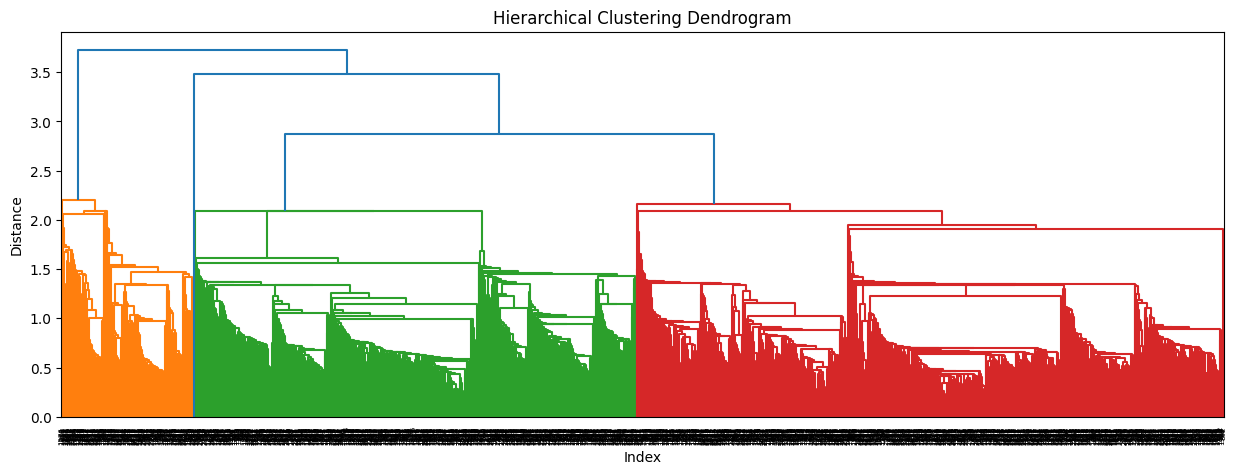

In [109]:
from scipy.cluster.hierarchy import linkage 
import scipy.cluster.hierarchy as sch # for creating dendrogram 
z = linkage(data, method="single",metric="euclidean")
plt.figure(figsize=(15, 5))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Index')
plt.ylabel('Distance')
sch.dendrogram(
    z,
    #leaf_rotation=6.,  # rotates the x axis labels
    #leaf_font_size=15.,  # font size for the x axis labels
)
plt.show() 

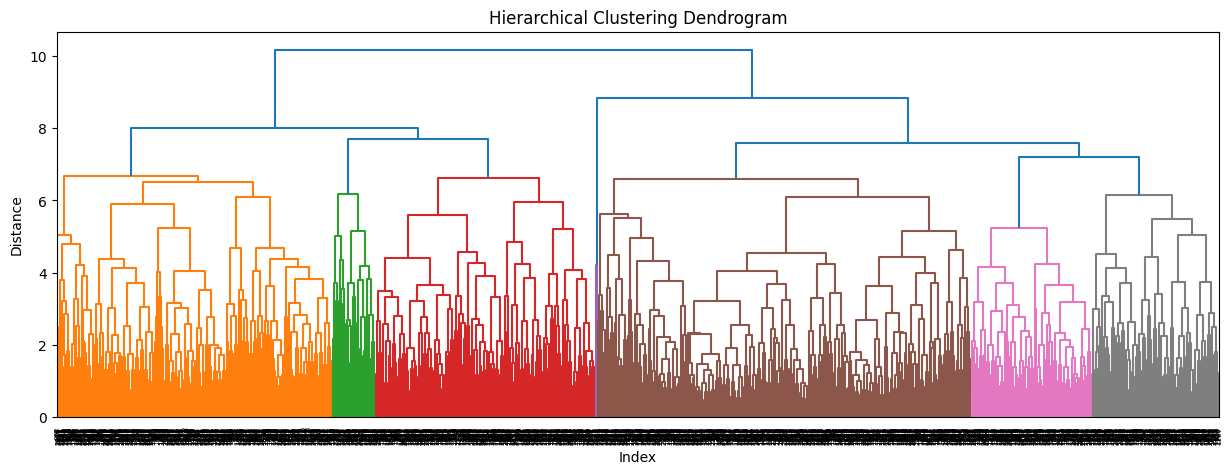

In [110]:
from scipy.cluster.hierarchy import linkage 
import scipy.cluster.hierarchy as sch # for creating dendrogram 
z = linkage(data, method="complete",metric="euclidean")
plt.figure(figsize=(15, 5))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Index')
plt.ylabel('Distance')
sch.dendrogram(
    z,
    #leaf_rotation=6.,  # rotates the x axis labels
    #leaf_font_size=15.,  # font size for the x axis labels
)
plt.show()     

In [111]:
from sklearn.cluster import AgglomerativeClustering 
import warnings 
warnings.filterwarnings('ignore')
h_complete = AgglomerativeClustering(n_clusters=3, linkage='complete',affinity = "euclidean").fit(data) 

cluster_labels=pd.Series(h_complete.labels_)
cluster_labels

0       0
1       1
2       0
3       1
4       0
       ..
2190    0
2191    0
2192    0
2193    0
2194    1
Length: 2195, dtype: int64

In [112]:
cluster_labels.value_counts()

1    1173
0    1018
2       4
dtype: int64

In [113]:
import sklearn
print(sklearn.metrics.silhouette_score(data, cluster_labels  ))
print(metrics.davies_bouldin_score(data, cluster_labels  ))
print(metrics.calinski_harabasz_score(data, cluster_labels  ))

0.1576996036530333
1.6887616098577036
263.9452078746008


Text(0.5, 1.0, 'Clusters using Hierarchical Clustering')

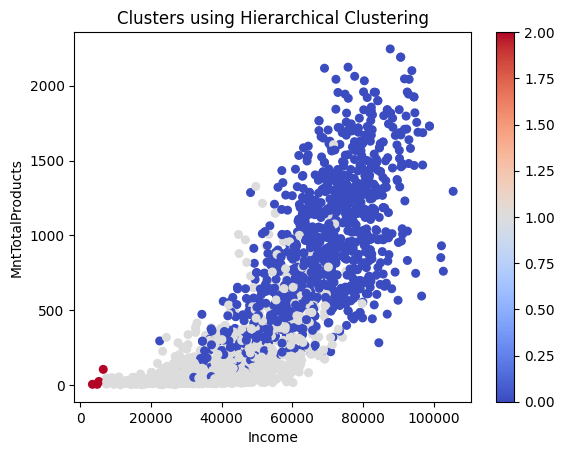

In [114]:
data_clean.plot(x="Income",y ="MntTotalProducts",c=h_complete.labels_,kind="scatter",s=30 ,cmap=plt.cm.coolwarm) 
plt.title('Clusters using Hierarchical Clustering') 

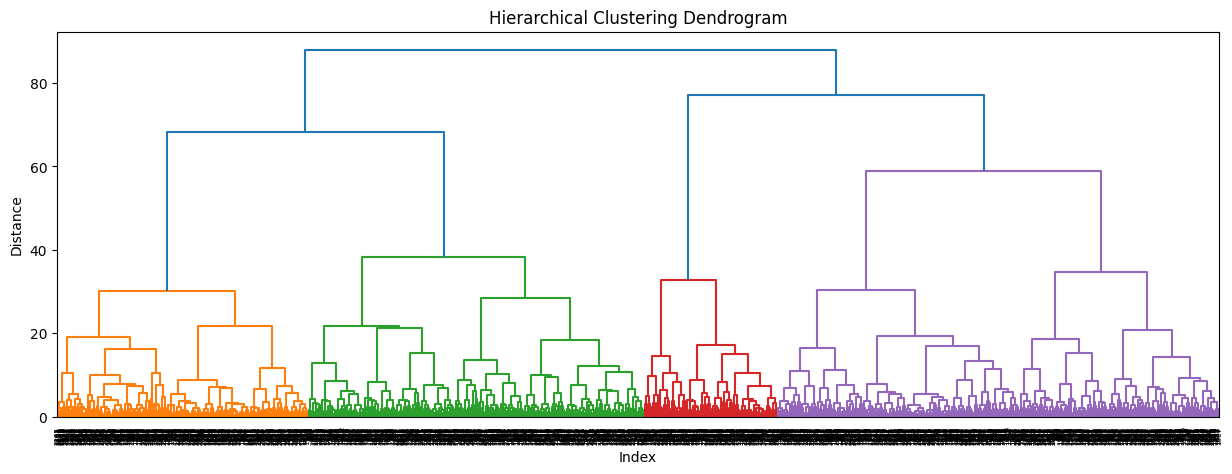

In [115]:
from scipy.cluster.hierarchy import linkage 
import scipy.cluster.hierarchy as sch # for creating dendrogram 
z = linkage(data, method="ward",metric="euclidean")
plt.figure(figsize=(15, 5))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Index')
plt.ylabel('Distance')
sch.dendrogram(
    z,
    #leaf_rotation=6.,  # rotates the x axis labels
    #leaf_font_size=15.,  # font size for the x axis labels
)
plt.show()     

In [116]:
from sklearn.cluster import AgglomerativeClustering 
import warnings 
warnings.filterwarnings('ignore')
h_complete = AgglomerativeClustering(n_clusters=4, linkage='ward',affinity = "euclidean").fit(data) 

cluster_labels=pd.Series(h_complete.labels_)
cluster_labels

0       1
1       3
2       1
3       3
4       0
       ..
2190    1
2191    0
2192    1
2193    0
2194    0
Length: 2195, dtype: int64

In [117]:
cluster_labels.value_counts()

0    834
1    634
3    476
2    251
dtype: int64

In [118]:
import sklearn
print(sklearn.metrics.silhouette_score(data, cluster_labels  ))
print(metrics.davies_bouldin_score(data, cluster_labels  ))
print(metrics.calinski_harabasz_score(data, cluster_labels  ))

0.22398207435418424
1.4560671205066675
524.1511620687045


In [119]:
#data_clean['Hclust']=cluster_labels # creating a  new column and assigning it to new column 
#data_clean 

In [120]:
#data_clean.groupby('Hclust')['Income_Grp'].value_counts()

Text(0.5, 1.0, 'Clusters using Hierarchical Clustering')

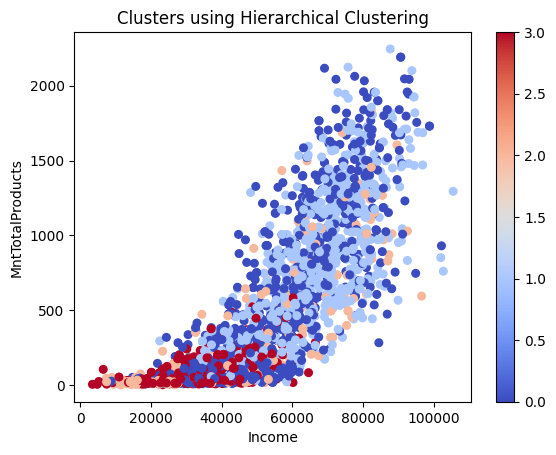

In [121]:
data_clean.plot(x="Income",y ="MntTotalProducts",c=h_complete.labels_,kind="scatter",s=30 ,cmap=plt.cm.coolwarm) 
plt.title('Clusters using Hierarchical Clustering') 

# Deleting outliers based on DBScan

In [122]:
ds=pd.Series(dbscan.labels_)  # converting numpy array into pandas series object 
data_final['Dclust']=ds # creating a  new column and assigning it to new column 
data_final

Income  NumWebVisitsMonth  CustomerAge  Children  MntTotalProducts  \
0     58138.0                  7           66         0              1269   
1     46344.0                  5           69         2                18   
2     71613.0                  4           58         0               602   
3     26646.0                  6           39         1                35   
4     58293.0                  5           42         1               334   
...       ...                ...          ...       ...               ...   
2190  61223.0                  5           56         1               934   
2191  64014.0                  7           77         3               436   
2192  56981.0                  6           42         0              1173   
2193  69245.0                  3           67         1               672   
2194  52869.0                  7           69         2               148   

      NumTotalPurchases  Education_Graduation  Education_PostGraduation  \
0                    21                     1                         0   
1                     4                     1                         0   
2                    11                     1                         0   
3                     4                     1                         0   
4                    13                     0                         1   
...                 ...                   ...                       ...   
2190                 14                     1                         0   
2191                 17                     0                         1   
2192                  6                     1                         0   
2193                 13                     0                         1   
2194                  7                     0                         1   

      Education_UnderGraduation  Marital_Status_Married  Dclust  
0                             0                       0       0  
1                             0                       0       0  
2                             0                       1       0  
3                             0                       1       0  
4                             0                       1       0  
...                         ...                     ...     ...  
2190                          0                       1       0  
2191                          0                       1       0  
2192                          0                       0       0  
2193                          0                       1       0  
2194                          0                       1       0  

[2195 rows x 11 columns]

In [123]:
data_final.groupby('Dclust')['Dclust'].value_counts()

Dclust  Dclust
-1      -1           1
 0       0        1943
 1       1         251
Name: Dclust, dtype: int64

In [124]:
data_cleaned = data_final[data_final.Dclust != -1]

In [125]:
#data_cleaned = data_final[data_final.Dclust != 5]

In [126]:
data_cleaned.shape

(2194, 11)

In [127]:
# data_cleaned.to_csv('data_clean.csv')